In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

%matplotlib notebook
import numpy as np

from scipy.signal import find_peaks


# Test data

Here, we generate artificial data which is then used to implement directional analysis.

18000


<IPython.core.display.Javascript object>


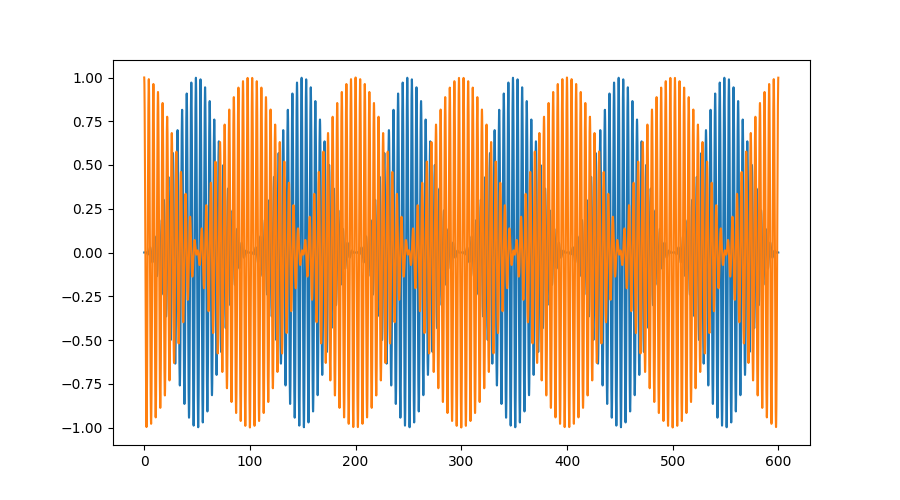

<IPython.core.display.Javascript object>


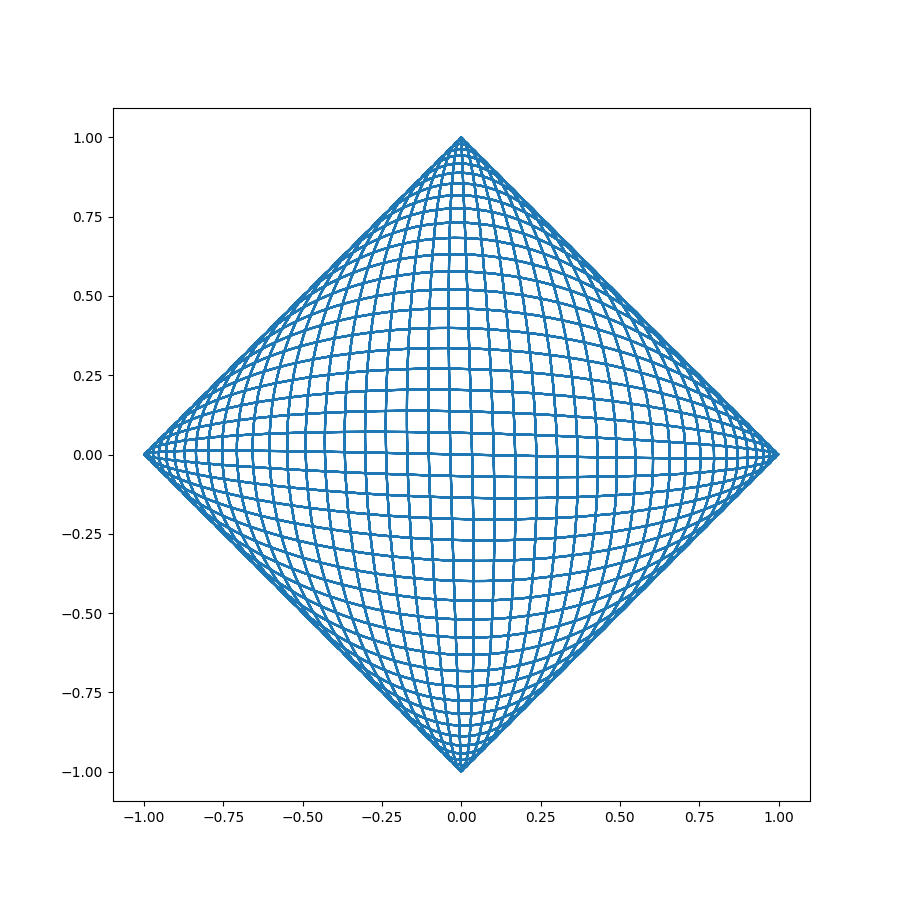

(-1.0991479474806445, 1.099147947480644, -1.1, 1.1)

In [14]:
omega = 2 * np.pi * 0.23
theta = np.pi/2.
t = np.arange(0, 600, 1./30.)

print(len(t))

Ax = np.sin(2*np.pi*0.005*t)
Ay = np.cos(2*np.pi*0.005*t)

x = Ax * np.sin(omega*t)
y = Ay * np.sin(omega*t + theta)

plt.figure(figsize=(9,5))
plt.plot(t, Ax*x)
plt.plot(t, y)

plt.figure(figsize=(9,9))
plt.plot(x,y)
plt.axis('equal')

<IPython.core.display.Javascript object>


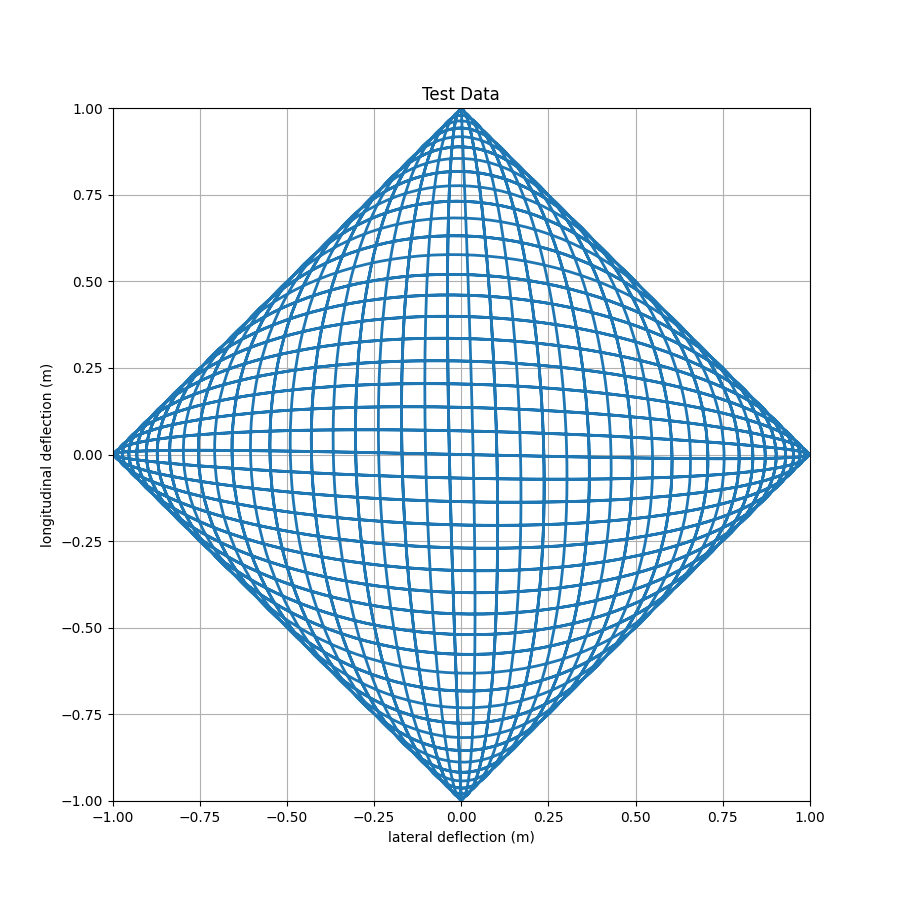

In [13]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(xlim=(-1, 1), 
              ylim=(-1, 1), 
              xlabel="lateral deflection (m)", 
              ylabel="longitudinal deflection (m)",
              title="Test Data"
             )
line, = ax.plot([], [], lw=2)
ax.grid()

# fig.figimage(watermark, 210, 1050, zorder=1, alpha=.5)
# time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
# text = ax.text(0.55, 0.97, '', transform=ax.transAxes,  fontsize=12)


def init():
    ax.set_xlabel="Lateral deflection"
    ax.set_ylabel="Longitudinal deflection"
    line.set_data([], [])
    return line,

def animate(i):
    # x = np.linspace(0, 1, 20)
    # y = np.sin(2 * np.pi * (x - 0.01 * i))
    xi = x[:i]
    yi = y[:i]
    line.set_data(xi, yi)
    #plt.savefig("animation_frames/2019-09-05-03-40/frame_{:04d}.png".format(i), dpi=150)
    return line,

anim = FuncAnimation(fig, 
                     animate, 
                     init_func=init,
                     frames=6000, 
                     interval=1, 
                     blit=True, 
                     repeat=True,
                    )

anim.save('Testdata.mp4', writer=writer)
# anim.save('Orbit.gif', writer='imagemagick')